# Storytelling with EDA and Prediction of Stroke

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare stroke dataset.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 12)

Data contains 5110 observations with 12 attributes

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI column has all the missing values

Questions to be asked:
Is the myth true, Males have more strokes than females?
Glucose level or bmi, above/below some value lead to stroke
Does married people gets more stroke than unmarried people?
Do people working in private sector has more chance of stroke?
Common assumption of smoking people has more stroke. Is it True?
People having hypertension are more prone to stroke
People living in city are at high risk of stroke?
Does age has direct impact on stroke?

<span style='color:Blue'> Variance features distribution.  </span>


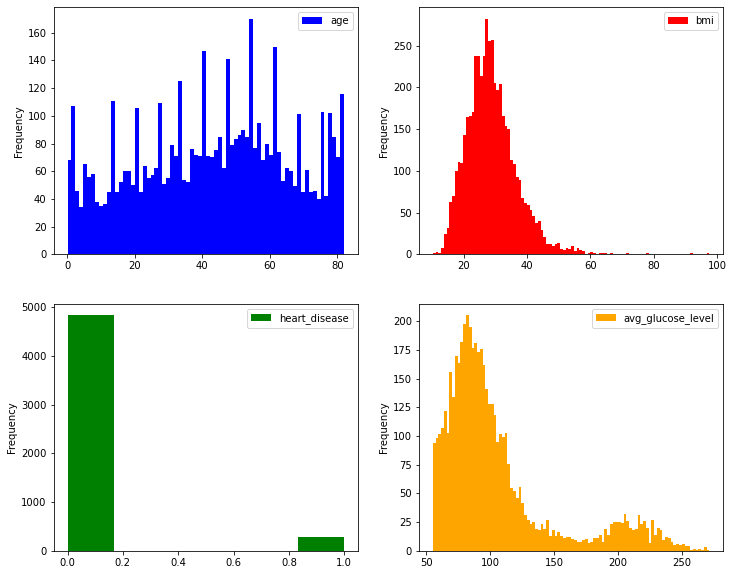

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

We have good distribution for age.
Looks like we have outliers in bmi.
Avg glucose distribution is reasonable because the normal avg of blood in sugar is less than 140 , this feature will be helpful to know if diabetes have correlation with strokes

<AxesSubplot:xlabel='gender', ylabel='count'>

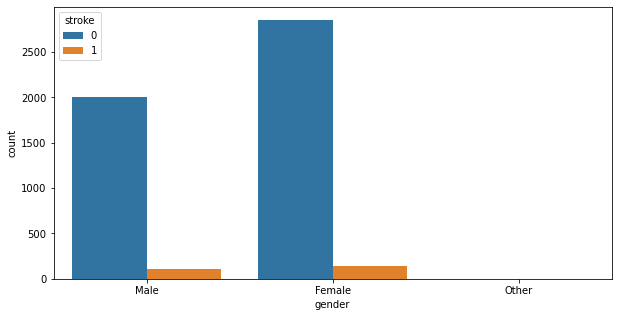

In [11]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x='gender', hue='stroke', data=df)

In [19]:
stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

female = df['gender'].value_counts().values[0]
male =  df['gender'].value_counts().values[1]

stroke_female = round (stroke_gen.values[0] / female * 100, 2)
stroke_male = round( stroke_gen.values[1] / male *100, 2)
print(stroke_female)
print(stroke_male)

4.71
5.11


<span style='color:Red'> Stroke chances are almost equal for both male and female  </span>

0    4861
1     249
Name: stroke, dtype: int64


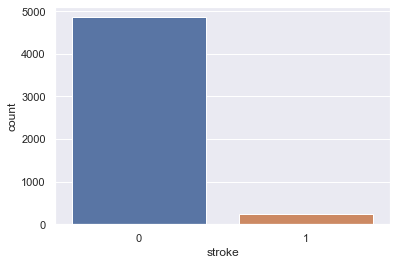

In [21]:
print(df.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="stroke")
plt.show()

From above dependent variable, we have really less peoples who suffered stroke. This  means that our dataset is imbalanced. We likely have to use sampling techniques to make the data balance.

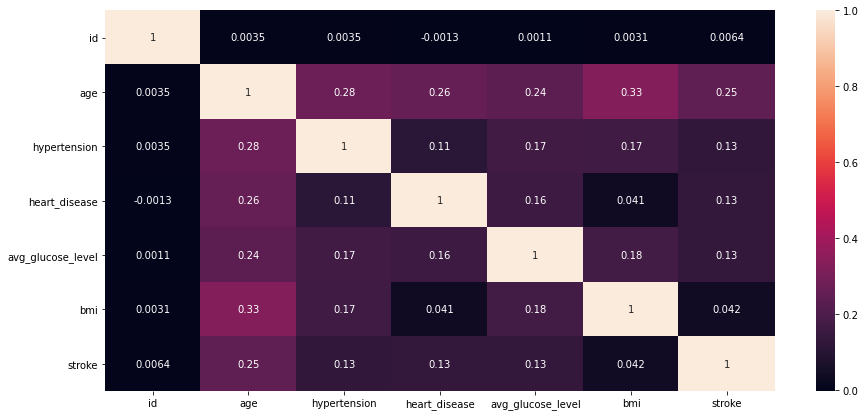

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

<span style='color:Blue'> There is no correlation between stroke and BMI  </span>

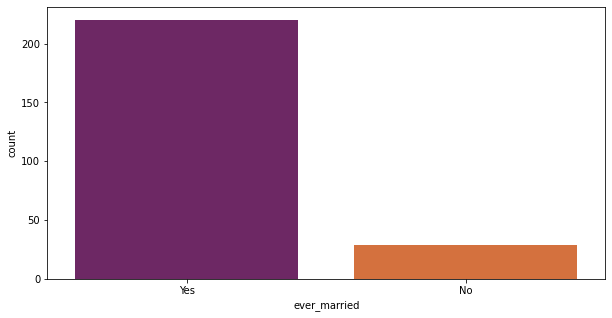

In [13]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

In [ ]:
Married people as expected has more chances having stroke

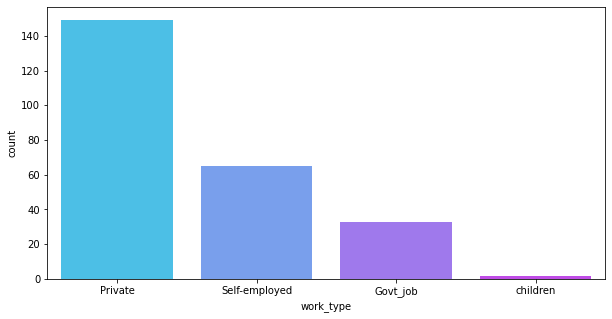

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

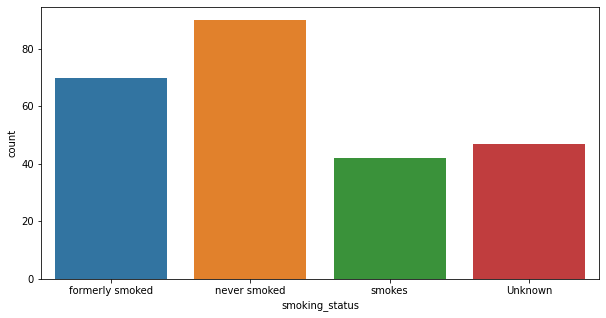

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status');

A lot of people never smoked in their life. But, we also don't know the exact status of Unknowns in our dataset.

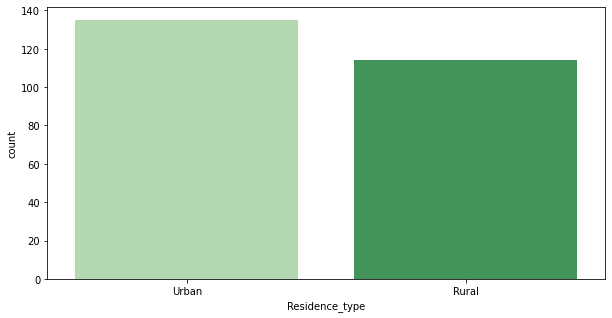

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');

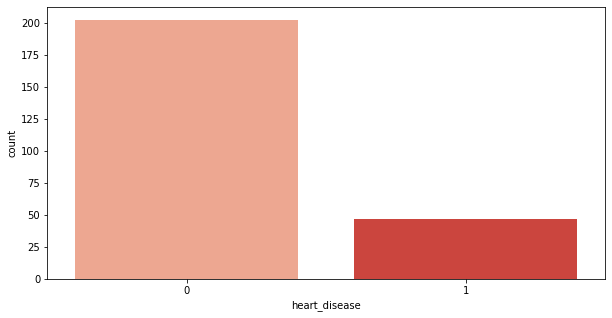

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

Most people who have had a stroke do not have any heart disease, but that does not prevent it being an influential factor

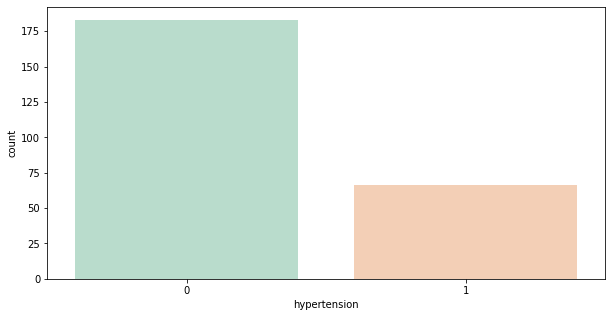

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

More than 25% of strok cases They had hypertension

Scatter plot for age vs avg_glucose_level with a Stroke hue

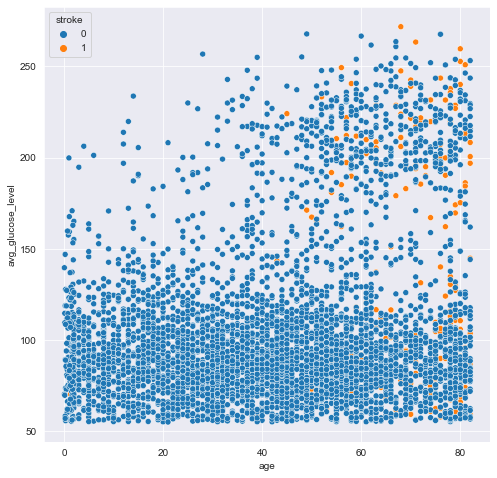

In [9]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue='stroke')
plt.show()

Average gluocose level is high for old age, chances of stroke is high too

Scatter plot for avg_glucose_level vs bmi with a Stroke hue 

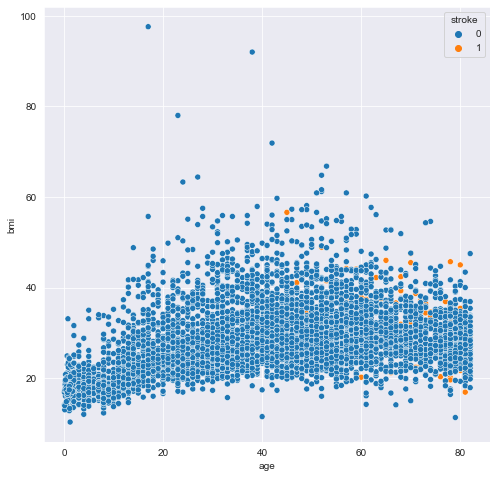

In [10]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue='stroke')
plt.show()

Notes:
The data set is imbalanced
The stroke chances are same for both male and female. 
BMI and average glusose level are high for old age people and chances of having stroke is more too.
Heart disease and hypertension as expected increases stroke chances. 
Being married, having private jobs and living in urban areas play important factor for stroke chances.
We need to use sampling technique for data balance.
BMI has null values which also should be replaced by either median or mean values. 